In [1]:
using Pkg
pkg"activate ."
pkg"instantiate"

 Activating environment at `~/Documents/otimizacao-em-julia/notebooks/Project.toml`


In [2]:
using Plots, Interact, LinearAlgebra, ForwardDiff
gr(size=(600,400))

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-11352751701614690733\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-17968513725110202091\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-11352751701614690733\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Plots.GRBackend()

In [136]:
pkg"add SolverBenchmark, BenchmarkProfiles"

  Resolving package versions...
Updating `~/Documents/otimizacao-em-julia/notebooks/Project.toml`
  [ecbce9bc] + BenchmarkProfiles v0.3.2
  [581a75fa] + SolverBenchmark v0.3.1
Updating `~/Documents/otimizacao-em-julia/notebooks/Manifest.toml`
  [1520ce14] + AbstractTrees v0.3.3
  [dce04be8] + ArgCheck v2.1.0
  [ecbce9bc] + BenchmarkProfiles v0.3.2
  [a8cc5b0e] + Crayons v4.0.4
  [59287772] + Formatting v0.4.1
  [bc5e4493] + GitHub v5.1.7
  [266f59ce] + LaTeXTabulars v0.1.1
  [1d6d02ad] + LeftChildRightSiblingTrees v0.1.2
  [d96e819e] + Parameters v0.12.1
  [32113eaa] + PkgBenchmark v0.2.10
  [08abe8d2] + PrettyTables v0.9.1
  [33c8b6b6] + ProgressLogging v0.1.3
  [581a75fa] + SolverBenchmark v0.3.1
  [5d786b92] + TerminalLoggers v0.1.2
  [3a884ed6] + UnPack v1.0.2


In [9]:
Float16(0.1) + Float16(0.2) - Float16(0.3)

Float16(-0.0002441)

In [8]:
1 // 10 + 2// 10 - 3//10

0//1

In [10]:
Inf

Inf

In [15]:
0 / 0

NaN

In [126]:
function gradiente(
        nlp;
        max_time = 3.0,
        max_iter = 10_000,
        η₁ = 1e-2,
        atol = 1e-6,
        rtol = 1e-6,
)
    
    t₀ = time()
    Δt = time() - t₀
    iter = 0
    
    x = copy(nlp.meta.x0)
    f(x) = obj(nlp, x)
    ∇f(x) = grad(nlp, x)
    fx = f(x)
    gx = ∇f(x)
    
    x⁺ = similar(x)
    
    ϵ = atol + rtol * norm(gx)
    
    status = :desconhecido
    
    # Cond. de parada
    resolvido = norm(gx) < ϵ # true ou false
    cansado = Δt > max_time || iter > max_iter
    while !(resolvido || cansado) # Não tiver satisfeito as condições de parada
        # Calculo a direção e passo e xₖ₊₁
        d = -gx
        slope = dot(gx, d)
        
        α = 1.0
        x⁺ = x + α * d
        f⁺ = f(x⁺)
        while f⁺ ≥ fx + η₁ * α * slope
            α = α / 2
            x⁺ = x + α * d
            f⁺ = f(x⁺)
            if α < 1e-8
                status = :busca_linear_pequena
                break
            end
        end
        if status != :desconhecido
            break
        end
        x .= x⁺
        fx = f⁺
        gx = ∇f(x)
        
        resolvido = norm(gx) < ϵ
        Δt = time() - t₀
        iter += 1
        cansado = Δt > max_time || iter > max_iter
    end
    
    
    if resolvido
        status = :sucesso
    elseif cansado
        if Δt > max_time
            status = :max_time
        elseif iter > max_iter
            status = :max_iter
        end
    end
    
    return x, status, Δt, iter
end

gradiente (generic function with 2 methods)

In [127]:
f(x) = (x[1] - 1)^2 + 4 * (x[2] - x[1]^2)^2
@time gradiente(f, [-1.2; 1.0])

  0.029063 seconds (36.77 k allocations: 1.588 MiB)


([1.0000131550736375, 1.000027216137535], :sucesso, 0.029059171676635742, 337)

In [16]:
g = rand(2)
sucesso = norm(g) < 1e-4

false

In [111]:
using CUTEst

┌ Info: Precompiling CUTEst [1b53aba6-35b6-5f92-a507-53c67d53f819]
└ @ Base loading.jl:1278
┌ Info: using problem repository
│   ENV["MASTSIF"] = /home/abel/.julia/artifacts/a7ea0d0aaf29a39ca0fe75588fc077cdd5b5ed54/optrove-sif-99c5b38e7d03
└ @ CUTEst /home/abel/.julia/packages/CUTEst/h73Ae/src/CUTEst.jl:73


In [112]:
using NLPModels

In [128]:
nlp = CUTEstModel("ROSENBR")

  Problem name: ROSENBR
   All variables: ████████████████████ 2      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            free: ████████████████████ 2                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
          infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            nnzh: (  0.00% sparsity)   3               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
                                                    nonlinear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
                                                         nnzj: (------% sparsity)         



In [129]:
gradiente(nlp)

([0.9998188896482056, 0.9996367239274359], :sucesso, 0.1028130054473877, 6844)

In [114]:
x0 = nlp.meta.x0
obj(nlp, x0)

24.199999999999996

In [115]:
grad(nlp, x0)

2-element Array{Float64,1}:
 -215.59999999999997
  -87.99999999999999

In [116]:
hess(nlp, x0)

2×2 SparseArrays.SparseMatrixCSC{Float64,Int64} with 3 stored entries:
  [1, 1]  =  1330.0
  [2, 1]  =  480.0
  [2, 2]  =  200.0

In [130]:
finalize(nlp)

In [121]:
pnames = CUTEst.select(max_var=2, max_con=0, only_free_var=true)
problems = (CUTEstModel(p) for p in pnames)

Base.Generator{Array{String,1},Type{CUTEstModel}}(CUTEstModel, ["JUDGE", "WAYSEA2", "HILBERTA", "BOXBODLS", "HIMMELBB", "MUONSINELS", "PRICE4", "SISSER", "SINEVAL", "MISRA1ALS"  …  "HUMPS", "EGGCRATE", "ELATVIDU", "ROSENBRTU", "MISRA1CLS", "CLIFF", "POWELLSQLS", "EXP2", "LOGHAIRY", "CUBE"])

In [131]:
error("Falhou")

ErrorException: Falhou

In [135]:
for nlp in problems
    
    try
        x, status, Δt, iter = gradiente(nlp)
        
        println("$(nlp.meta.name)\t\t$(status)\t\t$(norm(grad(nlp, x)))")
    catch ex
        println(ex)
    finally
        finalize(nlp)
    end
end

JUDGE
JUDGE		sucesso		0.0016604469275166062
WAYSEA2
WAYSEA2		sucesso		0.002056838985015686
HILBERTA
HILBERTA		sucesso		5.928450988799028e-6
BOXBODLS
BOXBODLS		sucesso		0.0015723711795481462
HIMMELBB
HIMMELBB		sucesso		0.21397825679500504
MUONSINELS
MUONSINELS		sucesso		0.030862075886016135
PRICE4
PRICE4		sucesso		0.009644878518646325
SISSER
SISSER		sucesso		1.3028288158043847e-5
SINEVAL
SINEVAL		max_iter		0.2241786531934753
MISRA1ALS
MISRA1ALS		busca_linear_pequena		1.57393748899856e8
WAYSEA1
WAYSEA1		sucesso		0.5824772930567106
HAIRY
HAIRY		sucesso		6.0301990076391346e-5
HIMMELBCLS
HIMMELBCLS		sucesso		1.8714370145111468e-5
MARATOSB
MARATOSB		sucesso		0.9249591461152498
POWELLBSLS
POWELLBSLS		busca_linear_pequena		20000.73556071284
HIMMELBG
HIMMELBG		sucesso		9.556236479890828e-7
DENSCHNF
DENSCHNF		sucesso		0.0003831022585716191
PRICE3
PRICE3		sucesso		0.0083740419130386
HIMMELBH
HIMMELBH		busca_linear_pequena		3.314396074413992e209
ZANGWIL2
ZANGWIL2		sucesso		2.3158944264082826e-6
MI

In [219]:
using Random
Random.seed!(0)

np = 30
nm = 3
P = ceil.(rand(np, nm) ./ rand(np, nm), digits=1)
P[:,3] = P[:,1] + P[:,2]
P[rand(1:np*nm, 5nm)] .= Inf
P

30×3 Array{Float64,2}:
  Inf    2.0    3.8
  14.4   1.0   15.4
   0.4   0.4    0.8
   0.5   1.5   Inf
   0.3   0.6    0.9
  Inf    0.9    1.9
   0.1   0.9    1.0
  Inf    0.1    1.2
   0.6   7.4   Inf
   1.2   6.7    7.9
  Inf    1.1    2.0
   1.3   3.3   Inf
   1.0   2.0    3.0
   ⋮          
   1.9  Inf     7.6
  Inf   Inf     1.7
   0.6  Inf     0.9
   0.1  Inf     4.8
   1.6   4.1    5.7
   3.0   0.7    3.7
   0.1  Inf     6.8
   0.4   1.0    1.4
   0.2   0.7    0.9
 120.3   0.6  120.9
   1.7   0.8    2.5
   0.2   4.3    4.5

In [220]:
robustez = sum(P .< Inf, dims=1) / np

1×3 Array{Float64,2}:
 0.833333  0.8  0.9

In [221]:
R = P ./ minimum(P, dims=2)
sum(R .== 1, dims=1) / np

1×3 Array{Float64,2}:
 0.566667  0.433333  0.0333333

In [222]:
sum(R .≤ 2, dims=1) / np

1×3 Array{Float64,2}:
 0.6  0.5  0.2

In [223]:
ρ(τ, k) = sum(R[:,k] .≤ τ) / np

ρ (generic function with 1 method)

In [224]:
R

30×3 Array{Float64,2}:
  Inf        1.0        1.9
  14.4       1.0       15.4
   1.0       1.0        2.0
   1.0       3.0       Inf
   1.0       2.0        3.0
  Inf        1.0        2.11111
   1.0       9.0       10.0
  Inf        1.0       12.0
   1.0      12.3333    Inf
   1.0       5.58333    6.58333
  Inf        1.0        1.81818
   1.0       2.53846   Inf
   1.0       2.0        3.0
   ⋮                  
   1.0      Inf         4.0
  Inf       Inf         1.0
   1.0      Inf         1.5
   1.0      Inf        48.0
   1.0       2.5625     3.5625
   4.28571   1.0        5.28571
   1.0      Inf        68.0
   1.0       2.5        3.5
   1.0       3.5        4.5
 200.5       1.0      201.5
   2.125     1.0        3.125
   1.0      21.5       22.5

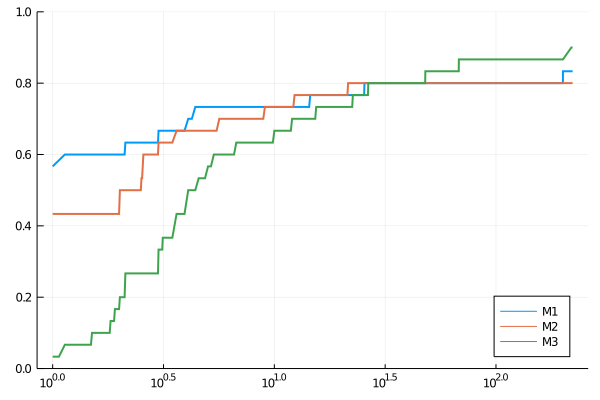

In [225]:
τmax = unique(sort(R[:]))[end-1]
plot(leg=:bottomright, xaxis=:log)
for k = 1:3
    plot!(τ -> ρ(τ, k), 1.0, 1.1τmax, lab="M$k", lw=2)
end
ylims!(0, 1)